In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
first_iter = {"train loss" : [2.090489908854167, 1.993703884548611, 1.9580949797453704, 1.949994212962963, 1.935711624710648, 1.9244648799189814, 1.9124348958333333, 1.8852446831597223, 1.8565970413773147, 1.8405248119212962, 1.8303714554398147, 1.8114095052083334, 1.7836912254050925, 1.7804913556134259, 1.7028707320601852, 1.65861328125, 1.643221752025463, 1.6320417390046296, 1.640169089988426, 1.6310631872106482, 1.618278175636574, 1.6150934968171295, 1.6171225766782407, 1.6032993344907407, 1.6049594907407407, 1.6020759186921296], 
"test loss" : [2.050235003409301, 2.1495323406874074, 1.9317728076460798, 1.9223665316429364, 1.9325436925041606, 1.936309272720969, 1.893972724147097, 1.8622342623197115, 1.8353647085336537, 1.8365724100869083, 1.8380948580228365, 1.7750477085452108, 1.8595628004807692, 1.7633425018491125, 1.6379051434217826, 1.6144746859398114, 1.6141790807599852, 1.632834891595784, 1.6247683192145894, 1.5967748517820821, 1.5939161311945267, 1.6191559740777552, 1.6145723783052885, 1.6211481037929918, 1.5811888564973189, 1.5987039599898298], 
"train accuracy" : [0.3624537037037037, 0.46208333333333335, 0.4977314814814815, 0.5046296296296297, 0.5203703703703704, 0.5308333333333334, 0.5426851851851852, 0.5706018518518519, 0.6, 0.6154166666666666, 0.6255555555555555, 0.6439814814814815, 0.6719907407407407, 0.6752314814814815, 0.7536111111111111, 0.7991203703703704, 0.8131481481481482, 0.82375, 0.8168518518518518, 0.8256481481481481, 0.8391666666666666, 0.8413888888888889, 0.8400925925925926, 0.8541666666666666, 0.852175925925926, 0.8549537037037037], 
"test accuracy" : [0.4058801775147929, 0.307260840602175, 0.5249013957187268, 0.5379068047337278, 0.5257026627218935, 0.5216346153846154, 0.567615892760147, 0.5973249356422199, 0.6249383779672476, 0.6230892655412121, 0.6208086634528708, 0.6834319526627219, 0.5993589593108589, 0.6974852071005917, 0.8211291612252681, 0.8476948032717733, 0.849112426035503, 0.8274778106508875, 0.8349975044205344, 0.8645217263486964, 0.8671104837451461, 0.8428254437869822, 0.8450443786982249, 0.8377711730595876, 0.8796844482421875, 0.8623027914374538]}

In [29]:
df = pd.DataFrame(first_iter)
df.head()

,train loss,test loss,train accuracy,test accuracy
0,2.090490,2.050235,0.362454,0.405880
1,1.993704,2.149532,0.462083,0.307261
2,1.958095,1.931773,0.497731,0.524901
3,1.949994,1.922367,0.504630,0.537907
4,1.935712,1.932544,0.520370,0.525703


In [30]:
log_names = ["logs\\resnet_eurosat_2023-11-02_18_49_35_403585.csv", "logs\\resnet_eurosat_2023-11-02_19_51_16_409866.csv", "logs\\resnet_eurosat_2023-11-02_20_43_30_757294.csv","logs\\resnet_eurosat_2023-11-10_15_33_20_299852.csv"]
for path in log_names:
    df_app = pd.read_csv(path, usecols=[0,1,2,3], names=["train loss", "test loss","train accuracy","test accuracy"])
    df = pd.concat([df,df_app],ignore_index=True)
df.tail()

,train loss,test loss,train accuracy,test accuracy
125,1.508331,1.510815,0.948935,0.950444
126,1.508426,1.526317,0.948889,0.933925
127,1.509801,1.531752,0.947269,0.928932
128,1.511369,1.517180,0.946204,0.944157
129,1.509720,1.516266,0.947778,0.944403


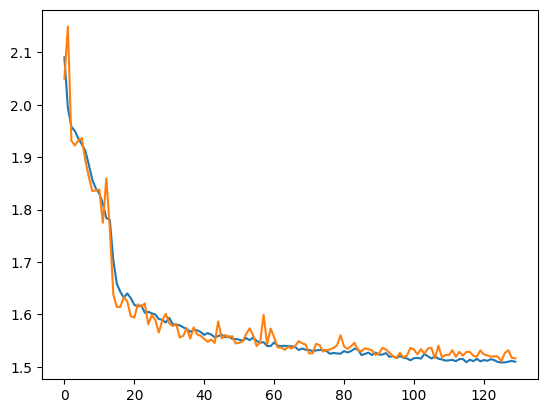

In [31]:
plt.plot(df.index, df["train loss"])
plt.plot(df.index, df["test loss"])
plt.show()

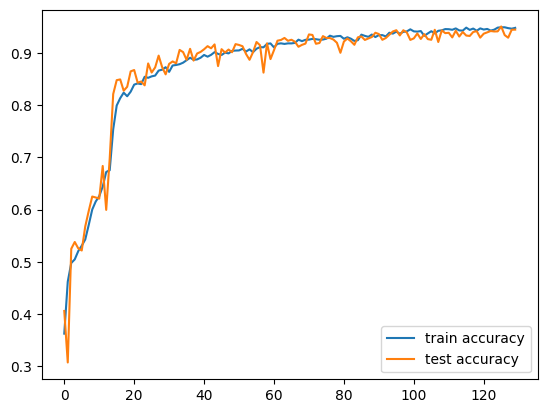

In [32]:
plt.plot(df.index, df["train accuracy"],label="train accuracy")
plt.plot(df.index, df["test accuracy"],label="test accuracy")
plt.legend()
plt.show()

In [33]:
from IPython.display import display
pd.set_option("display.max_rows", None)
#display(df)


In [34]:
df.to_csv("finished\\ResNet50\\train_data.csv",index=False)

In [35]:
import torch
import torchvision
from torch.utils.data import Dataset,DataLoader
from tqdm import tqdm
import torchmetrics.classification

from src.EuroSat_dataloaders import transformation_eurosat
from torchvision.datasets import EuroSAT
from torchvision.transforms import v2
from torch.utils.data import Dataset,DataLoader

from src.EuroSat_dataloaders import Train_Dataset_EuroSat,Test_Dataset_EuroSat

In [36]:
resnet50 = torch.load("finished\\ResNet50\\resnet50_model.pth")
resnet50.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [37]:

transforms = v2.Compose([
    v2.ToTensor(),
    v2.ToDtype(torch.float32),
    v2.Resize(224),
])
ds = EuroSAT("../EuroSat",transform=transforms,target_transform=transformation_eurosat,download=False)
ds_test = Test_Dataset_EuroSat(ds)
test_dataloader = DataLoader(dataset=ds_test, batch_size=32,shuffle=True,num_workers=3)

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [38]:
acc_metric = torchmetrics.classification.Accuracy(task="multiclass",num_classes=10).cuda()
accuracy = 0
with torch.no_grad():
    for (x_batch,y_batch),tqdm_progress in zip(iter(test_dataloader),tqdm(range(len(test_dataloader)))):
        x_batch.cuda()
        y_batch.cuda()
        y_pred = resnet50(x_batch.cuda())
        accuracy += acc_metric(y_pred,torch.argmax(y_batch.cuda(), dim=1))
print(f"accuracy : {float(accuracy)/len(test_dataloader)}")


  0%|          | 0/169 [00:00<?, ?it/s]c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
 99%|█████████▉| 168/169 [00:13<00:00, 12.72it/s]

accuracy : 0.9504437869822485
